In [ ]:
import data
import tfrecords_generator
import importlib
importlib.reload(data)
importlib.reload(tfrecords_generator)

from tfrecords_generator import write_data
from data import gen_fcst_norm 
from memory_profiler import memory_usage
import numpy as np

import warnings
warnings.filterwarnings('ignore')

years = [2021]
interval = 0.1

#mem = memory_usage((gen_fcst_norm, (year,)), interval=interval)
#time = np.arange(len(mem)) * interval
#mem_file = "log_memory_generating_norm.dat"

#np.savetxt(mem_file, np.array((time, mem)).T)

for year in years:
    mem = memory_usage((write_data, (year,)), interval=interval)
    time = np.arange(len(mem)) * interval
    mem_file = "/network/group/aopp/predict/TIP022_NATH_GFSAIMOD/cGAN/tfrecords/log_memory_writing_data_%s.dat"%year

    np.savetxt(mem_file, np.array((time, mem)).T)


Samples per image: 8
Doing time index 0


  0%|                                                                                 | 0/304 [00:00<?, ?it/s]

0 0


  3%|██▎                                                                   | 10/304 [24:33<7:44:35, 94.81s/it]

0 10


  7%|████▌                                                                 | 20/304 [39:06<6:51:49, 87.01s/it]

0 20


 10%|██████▉                                                               | 30/304 [54:03<6:59:00, 91.76s/it]

0 30


 13%|████████▋                                                         | 40/304 [1:24:52<13:51:42, 189.03s/it]

0 40


 16%|██████████▊                                                       | 50/304 [2:07:20<29:36:15, 419.59s/it]

0 50


 20%|█████████████▏                                                     | 60/304 [2:23:23<7:13:16, 106.54s/it]

0 60


 23%|███████████████▋                                                    | 70/304 [2:38:49<5:54:01, 90.77s/it]

0 70


 26%|█████████████████▉                                                  | 80/304 [2:54:09<5:42:26, 91.72s/it]

0 80


 30%|████████████████████▏                                               | 90/304 [3:08:54<5:15:10, 88.37s/it]

0 90


 33%|██████████████████████                                             | 100/304 [3:24:00<5:12:20, 91.87s/it]

0 100


 36%|████████████████████████▏                                          | 110/304 [3:39:12<4:53:56, 90.91s/it]

0 110


 37%|████████████████████████▋                                          | 112/304 [3:42:20<4:56:23, 92.62s/it]

In [15]:
import pickle

with open(f'/network/home/n/nath/cGAN/constants-regICPAC/FCSTNorm2021.pkl', 'rb') as f:
    norm = pickle.load(f)

norm['Convective available potential energy']
    

{'min': 0.0,
 'max': 5060.9165,
 'mean': 353.36827374192967,
 'std': 576.8885141782403}

In [5]:
import data
import importlib
importlib.reload(data)
from data import load_truth_and_mask

truth, mask = np.mean(np.stack(([load_truth_and_mask(str(date).replace('-',''), 0) for date in np.arange('2021-04-01', '2021-04-02', np.timedelta64(1,'D'), dtype='datetime64')])),axis=0)




['/network/group/aopp/predict/TIP018_HARRIS_TENSORFL/IMERG-regICPAC-6hr/20210402_00.nc4', '/network/group/aopp/predict/TIP018_HARRIS_TENSORFL/IMERG-regICPAC-6hr/20210402_06.nc4', '/network/group/aopp/predict/TIP018_HARRIS_TENSORFL/IMERG-regICPAC-6hr/20210402_12.nc4', '/network/group/aopp/predict/TIP018_HARRIS_TENSORFL/IMERG-regICPAC-6hr/20210402_18.nc4']


In [17]:
import glob
import xarray as xr

TRUTH_PATH = '/network/group/aopp/predict/TIP018_HARRIS_TENSORFL/IMERG-regICPAC-6hr/'
data_path = glob.glob(TRUTH_PATH+"*.nc4")

ds = xr.open_mfdataset(data_path[0])
#print(ds)

lat_reg_IMERG = ds.lat.values
lon_reg_IMERG = ds.lon.values


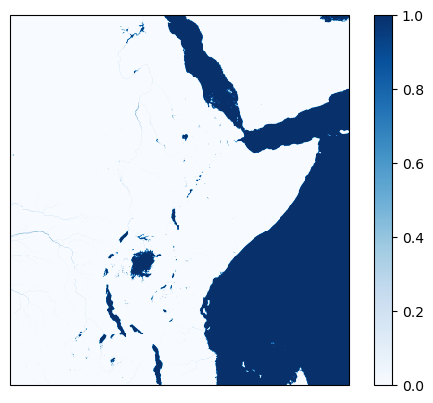

In [78]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

ax = plt.axes(projection = ccrs.PlateCarree())

mesh = ax.pcolormesh(lon_reg_IMERG, lat_reg_IMERG, np.squeeze(elev)[:,:,1], cmap='Blues')
plt.colorbar(mesh)

In [75]:
from data import load_hires_constants

elev = load_hires_constants(batch_size=1)

In [76]:
elev.shape

(1, 384, 352, 2)

In [58]:
from data_generator import DataGenerator
from data import all_fcst_fields

dgc = DataGenerator(['20210301','20210302','20210303'],
                       fcst_fields=all_fcst_fields,
                                start_hour=0,
                                end_hour=24,
                                batch_size=1,
                                log_precip=True,
                                shuffle=False,
                                constants=True,
                                fcst_norm=True)

sample = dgc.__getitem__(0)



RuntimeError: Forecast normalisation dictionary has not been loaded

In [14]:
sample[0]['lo_res_inputs'].shape

(1, 384, 352, 60)

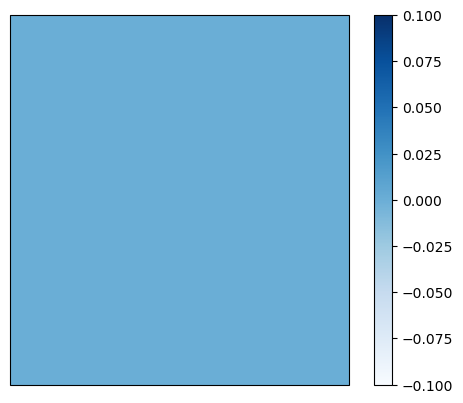

In [50]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

ax = plt.axes(projection = ccrs.PlateCarree())

mesh = ax.pcolormesh(lon_reg_IMERG, lat_reg_IMERG, np.squeeze(sample[1]['mask']), cmap='Blues')
plt.colorbar(mesh)

In [51]:
np.squeeze(sample[1]['mask'])

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])